In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import time
import numpy as np

In [2]:
from Hueristic_methods.Heuristic_Method import hueristic_Method 
from ML.adaboost import adaboost
from ML.lr import linear_regression  

In [3]:
# Load the dataset
train_file_path = "./datasets/Train_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
train_data = pd.read_csv(train_file_path)

eval_file_path = "./datasets/Eval_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
eval_data = pd.read_csv(eval_file_path)

In [4]:
print(f"Length of train data: {len(train_data)}")
print(f"Length of eval data: {len(eval_data)}")


Length of train data: 207360
Length of eval data: 34559


In [5]:
#Define levels
levels=5

# Parse relevant columns for all bid and ask levels
bid_columns = [f"bids[{i}].price" for i in range(levels)] + [f"bids[{i}].amount" for i in range(levels)]
ask_columns = [f"asks[{i}].price" for i in range(levels)] + [f"asks[{i}].amount" for i in range(levels)]
feature_columns = bid_columns  + ask_columns 
eval_columns=['mark_price','next_mark_price','Price Movement',"actual_direction"]

# Features and target
X_train_heuristic = train_data[feature_columns+['mark_price']]
X_train = train_data[feature_columns]
y_train = train_data['next_mark_price']
# X_test = test_data[feature_columns]
# y_test = test_data["target"]
X_eval_heuristic = eval_data[feature_columns+['mark_price']]
X_eval = eval_data[feature_columns]

y_eval = eval_data[eval_columns]

In [6]:
Heuristic_Method=hueristic_Method(X_train_heuristic,X_eval_heuristic,levels)
linear_regression=linear_regression(X_train,y_train,X_eval)
adaboost=adaboost(X_train,y_train,X_eval)


In [7]:
# Heuristic_Method Predict 
# Measure the execution time of the function
Heuristic_start_time = time.time()
Heuristic_Predict_data=Heuristic_Method.predict()
Heuristic_end_time = time.time()
execution_time_heuristic = (Heuristic_end_time - Heuristic_start_time)* 1000 
print(f"Execution_time(Heuristic_Method): {execution_time_heuristic:.2f} milliseconds")

# Linear Regression Predict 
# Measure the execution time of the function
linear_regression_start_time = time.time()
linear_regression_Predict_data=pd.DataFrame({"predicted_lr":linear_regression.predict()})
linear_regression_end_time = time.time()
execution_time_lr = (linear_regression_end_time - linear_regression_start_time)* 1000 
print(f"Execution_time(Linear Regression): {execution_time_lr:.2f} milliseconds")

# Adaboost Predict 
# Measure the execution time of the function
adaboost_start_time = time.time()
adaboost_Predict_data=pd.DataFrame({"predicted_adaboost":adaboost.predict()})
adaboost_end_time = time.time()
execution_time_adaboost = (adaboost_end_time - adaboost_start_time)* 1000 
print(f"Execution_time(adaboost): {execution_time_adaboost:.2f} milliseconds")



Execution_time(Heuristic_Method): 3889.14 milliseconds
Execution_time(Linear Regression): 6.58 milliseconds
Execution_time(adaboost): 98.37 milliseconds


In [8]:
# combine data tgt
Evaluate_result=pd.concat([y_eval, Heuristic_Predict_data,linear_regression_Predict_data,adaboost_Predict_data], axis=1)

In [9]:
# Evaluate performance (Mean Squared Error) based on mark price
mse_heuristic = mean_squared_error(Evaluate_result["next_mark_price"], Evaluate_result["predicted_heuristic"])
print(f"Heuristic Methods MSE (Eval Set): {mse_heuristic:.2f}")

# Evaluate performance using MSE on evaluation set
mse_lr = mean_squared_error(Evaluate_result['next_mark_price'], Evaluate_result['predicted_lr'])
print(f"Linear Regression MSE (Eval Set): {mse_lr:.2f}")

# Evaluate performance using MSE on evaluation set
mse_adaboost = mean_squared_error(Evaluate_result['next_mark_price'], Evaluate_result['predicted_adaboost'])
print(f"AdaBoost MSE (Eval Set): {mse_adaboost:.2f}")

Heuristic Methods MSE (Eval Set): 2031416.51
Linear Regression MSE (Eval Set): 25.41
AdaBoost MSE (Eval Set): 1118.87


In [10]:
# Calculate directional accuracy
directional_accuracy_heuristic = (Evaluate_result["actual_direction"] == Evaluate_result["predicted_direction_heuristic"]).mean()
print(f"Directional Accuracy (heuristic): {directional_accuracy_heuristic:.2%}")

# Calculate directional accuracy
Evaluate_result.loc[:, "predicted_direction_lr"] = np.sign(Evaluate_result["predicted_lr"] - Evaluate_result["next_mark_price"])
directional_accuracy_lr = (Evaluate_result["actual_direction"] == Evaluate_result["predicted_direction_lr"]).mean()
print(f"Directional Accuracy (Linear Regression): {directional_accuracy_lr:.2%}")

# Calculate directional accuracy
Evaluate_result.loc[:, "predicted_direction_adaboost"] = np.sign(Evaluate_result["predicted_adaboost"] - Evaluate_result["next_mark_price"])
directional_accuracy_adaboost = (Evaluate_result["actual_direction"] == Evaluate_result["predicted_direction_adaboost"]).mean()
print(f"Directional Accuracy (AdaBoost): {directional_accuracy_adaboost:.2%}")

Directional Accuracy (heuristic): 36.41%
Directional Accuracy (Linear Regression): 29.83%
Directional Accuracy (AdaBoost): 23.47%


In [11]:
# Tolerance-Based Accuracy
tolerance = 0.0001 * Evaluate_result["next_mark_price"].mean()  # Set tolerance to 0.01% of average price

# Calculate tolerance-based accuracy
Evaluate_result.loc[:, "tolerance_heuristic"] = abs(Evaluate_result["predicted_heuristic"] - Evaluate_result["next_mark_price"]) <= tolerance
tolerance_accuracy_heuristic = Evaluate_result["tolerance_heuristic"].mean()
print(f"Tolerance-Based Accuracy (heuristic): {tolerance_accuracy_heuristic:.2%}")

# Calculate tolerance-based accuracy
Evaluate_result.loc[:, "tolerance_lr"] = abs(Evaluate_result["predicted_lr"] - Evaluate_result["next_mark_price"]) <= tolerance
tolerance_accuracy_lr = Evaluate_result["tolerance_lr"].mean()
print(f"Tolerance-Based Accuracy (Linear Regression): {tolerance_accuracy_lr:.2%}")

# Calculate tolerance-based accuracy
Evaluate_result.loc[:, "tolerance_adaboost"] = abs(Evaluate_result["predicted_adaboost"] - Evaluate_result["next_mark_price"]) <= tolerance
tolerance_accuracy_adaboost = Evaluate_result["tolerance_adaboost"].mean()
print(f"Tolerance-Based Accuracy (AdaBoost): {tolerance_accuracy_adaboost:.2%}")

Tolerance-Based Accuracy (heuristic): 0.16%
Tolerance-Based Accuracy (Linear Regression): 80.95%
Tolerance-Based Accuracy (AdaBoost): 18.25%


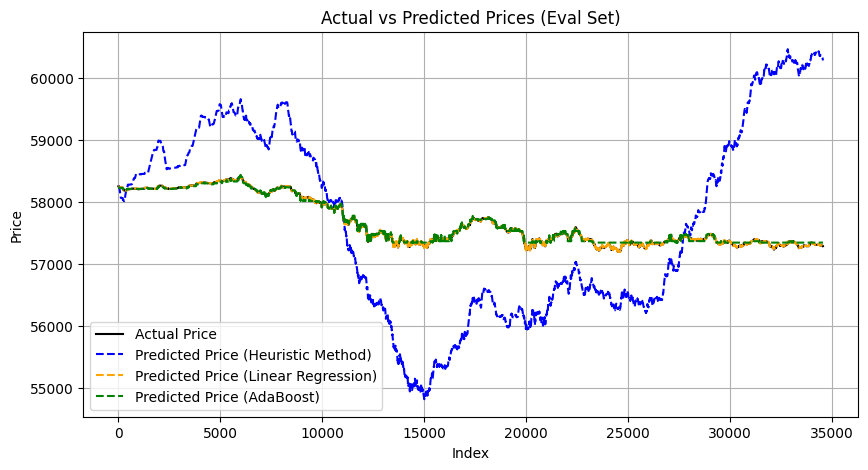

In [12]:
# Plot actual vs predicted prices
# Report Size
# plt.figure(figsize=(12, 6))

# Poster size
plt.figure(figsize=(10, 5))

# Actual
plt.plot(Evaluate_result.index, Evaluate_result["next_mark_price"], label="Actual Price", color="black")

# Predicted prices
plt.plot(Evaluate_result.index,Evaluate_result["predicted_heuristic"], label="Predicted Price (Heuristic Method)", color="blue", linestyle="--")
plt.plot(Evaluate_result.index, Evaluate_result["predicted_lr"], label="Predicted Price (Linear Regression)", color="orange", linestyle="--")
plt.plot(Evaluate_result.index, Evaluate_result["predicted_adaboost"], label="Predicted Price (AdaBoost)", color="green", linestyle="--")


plt.title("Actual vs Predicted Prices (Eval Set)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


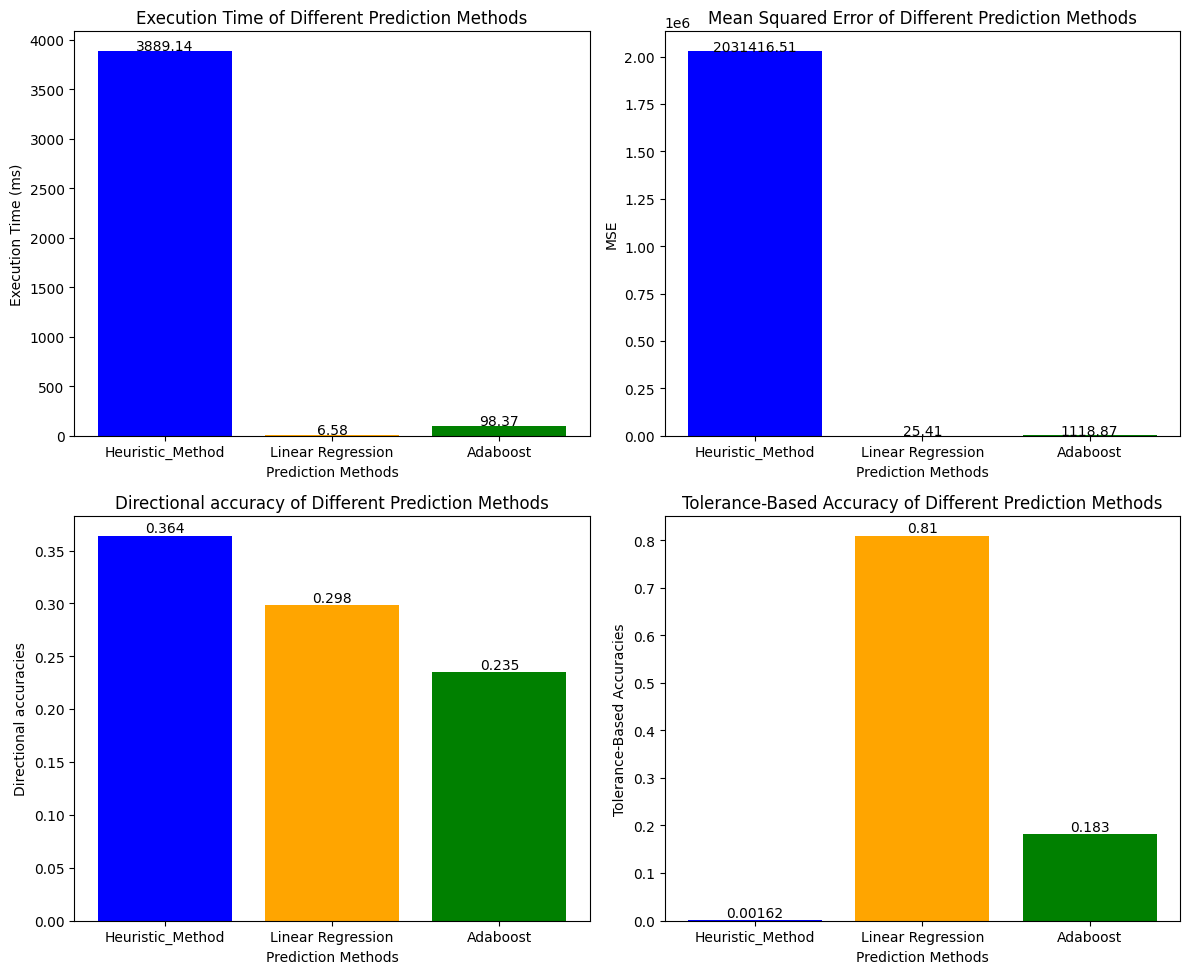

In [13]:
# Define the methods and the performance metric 
methods = ['Heuristic_Method', 'Linear Regression', 'Adaboost']
execution_times = [execution_time_heuristic, execution_time_lr, execution_time_adaboost]
mses = [mse_heuristic, mse_lr, mse_adaboost]
directional_accuracies = [directional_accuracy_heuristic, directional_accuracy_lr, directional_accuracy_adaboost]
Tolerance_accuracies= [tolerance_accuracy_heuristic, tolerance_accuracy_lr, tolerance_accuracy_adaboost]

plt.figure(figsize=(12, 10))

# Create execution_times bar chart
plt.subplot(2,2,1)
plt.bar(methods, execution_times, color=['blue', 'orange', 'green'])

# Add labels and title
plt.xlabel('Prediction Methods')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Different Prediction Methods')

# Display the value on top of the bars
for i, time in enumerate(execution_times):
    plt.text(i, time + 5, f"{time:.2f}", ha='center')

# Create mses bar chart
plt.subplot(2,2,2)
plt.bar(methods, mses, color=['blue', 'orange', 'green'])

# Add labels and title
plt.xlabel('Prediction Methods')
plt.ylabel('MSE')
plt.title('Mean Squared Error of Different Prediction Methods')

# Display the value on top of the bars
for i, mse in enumerate(mses):
    plt.text(i, mse + 5, f"{mse:.2f}", ha='center')

# Create directional_accuracies bar chart
plt.subplot(2,2,3)
directional_accuracies_bars=plt.bar(methods, directional_accuracies, color=['blue', 'orange', 'green'])

# Add labels and title
plt.xlabel('Prediction Methods')
plt.ylabel('Directional accuracies')
plt.title('Directional accuracy of Different Prediction Methods')

# Displaying the values on top of each bar
for bar in directional_accuracies_bars:
    height = bar.get_height()
    # plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
    # Poster
    height_formatted = "{:.3g}".format(height)
    plt.text(bar.get_x() + bar.get_width() / 2, height, height_formatted, ha='center', va='bottom')

# Create directional_accuracies bar chart
plt.subplot(2,2,4)
Tolerance_accuracies_bars=plt.bar(methods, Tolerance_accuracies, color=['blue', 'orange', 'green'])

# Add labels and title
plt.xlabel('Prediction Methods')
plt.ylabel('Tolerance-Based Accuracies')
plt.title('Tolerance-Based Accuracy of Different Prediction Methods')

# Displaying the values on top of each bar
for bar in Tolerance_accuracies_bars:
    height = bar.get_height()
    # plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
    # Poster
    height_formatted = "{:.3g}".format(height)
    plt.text(bar.get_x() + bar.get_width() / 2, height, height_formatted, ha='center', va='bottom')

# Show the charts
plt.tight_layout()
plt.show()

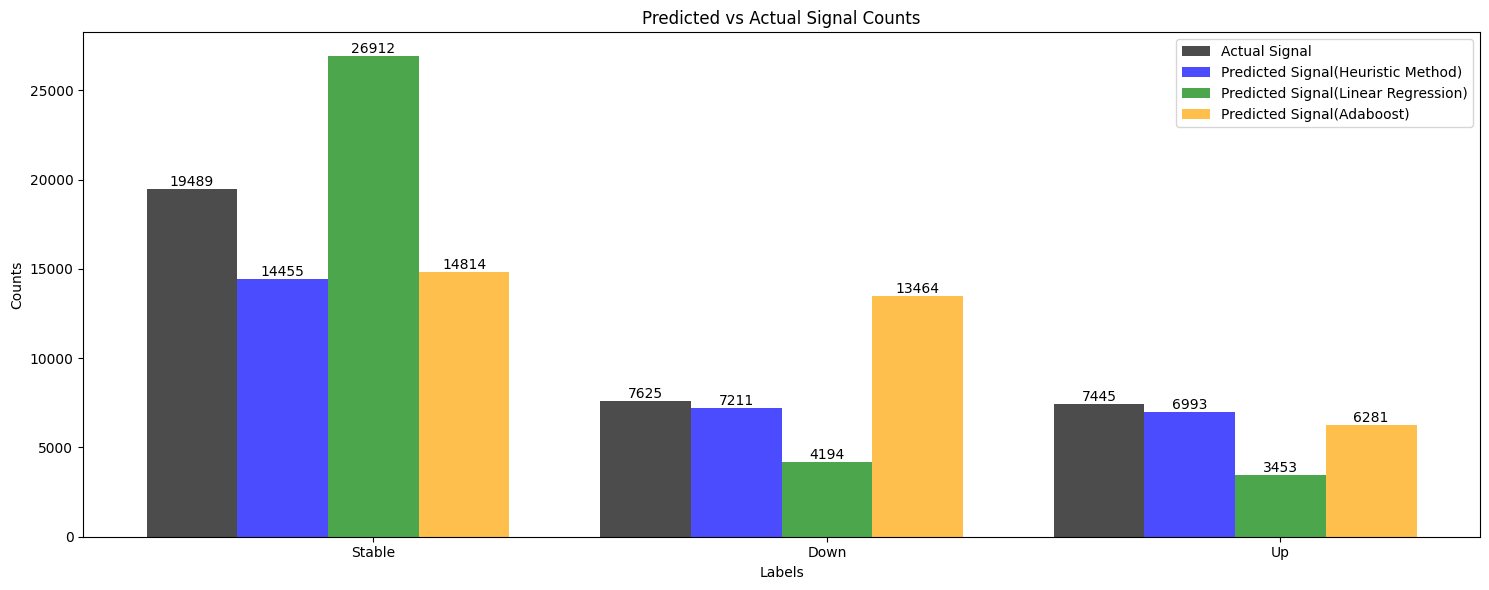

In [51]:
# Add signal distribution visualization
direction_mapping = {1.0: "up", 0.0: "stable", -1.0: "down"}
Evaluate_result["predicted_movement_heuristic"] = Evaluate_result["predicted_direction_heuristic"].map(direction_mapping)

# Add symbol columns based on comparison with the last mark price
symbol_tolerance = 0.0001 * Evaluate_result["next_mark_price"].mean()  # Adjust as needed
Evaluate_result.loc[:, "predicted_movement_lr"] = None
Evaluate_result.loc[:, "predicted_movement_adaboost"] = None


for i in range(len(Evaluate_result)):
    # Linear Regression symbol logic
    if Evaluate_result["predicted_lr"].iloc[i] > Evaluate_result["mark_price"].iloc[i] + symbol_tolerance:
        Evaluate_result.loc[Evaluate_result.index[i], "predicted_movement_lr"] = "up"
    elif Evaluate_result["predicted_lr"].iloc[i] < Evaluate_result["mark_price"].iloc[i] - symbol_tolerance:
        Evaluate_result.loc[Evaluate_result.index[i], "predicted_movement_lr"] = "down"
    else:
        Evaluate_result.loc[Evaluate_result.index[i], "predicted_movement_lr"] = "stable"

    # AdaBoost symbol logic
    if Evaluate_result["predicted_adaboost"].iloc[i] > Evaluate_result["mark_price"].iloc[i]+ symbol_tolerance:
        Evaluate_result.loc[Evaluate_result.index[i], "predicted_movement_adaboost"] = "up"
    elif Evaluate_result["predicted_adaboost"].iloc[i] < Evaluate_result["mark_price"].iloc[i] - symbol_tolerance:
        Evaluate_result.loc[Evaluate_result.index[i], "predicted_movement_adaboost"] = "down"
    else:
        Evaluate_result.loc[Evaluate_result.index[i], "predicted_movement_adaboost"] = "stable"

Actual_signal_counts = Evaluate_result["Price Movement"].value_counts()
symbol_counts_heuristic = Evaluate_result["predicted_movement_heuristic"].value_counts()
symbol_counts_lr = Evaluate_result["predicted_movement_lr"].value_counts()
symbol_counts_adaboost = Evaluate_result["predicted_movement_adaboost"].value_counts()

labels = Actual_signal_counts.index.tolist()
actual_values = Actual_signal_counts.values.tolist()

heuristic_predict_values = symbol_counts_heuristic.values.tolist()
lr_predict_values = symbol_counts_lr.values.tolist()
adaboost_predict_values = symbol_counts_adaboost.values.tolist()

# Setting the positions and width for the bars
positions = np.arange(len(labels))
bar_width = 0.2

plt.figure(figsize=(15, 6))

# Create the bar plot
bar1=plt.bar(positions - 1.5*bar_width , actual_values, bar_width, label='Actual Signal', color='black', alpha=0.7)
bar2=plt.bar(positions-0.5*bar_width, heuristic_predict_values, bar_width, label='Predicted Signal(Heuristic Method)', color='b', alpha=0.7)
bar3=plt.bar(positions+ bar_width*0.5, lr_predict_values, bar_width, label='Predicted Signal(Linear Regression)', color='green', alpha=0.7)
bar4=plt.bar(positions+ bar_width*1.5, adaboost_predict_values, bar_width, label='Predicted Signal(Adaboost)', color='orange', alpha=0.7)



# Adding labels, title, and legend
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Predicted vs Actual Signal Counts')
plt.xticks(positions + bar_width / 2, labels)
plt.legend()

# Displaying the values on top of each bar
for bar in bar1 + bar2 + bar3 + bar4:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()